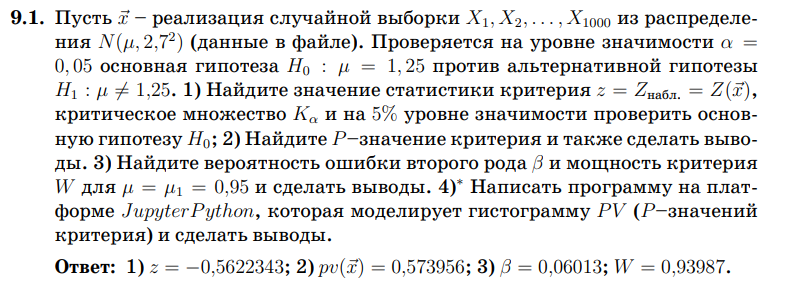

In [1]:
import numpy as np
from scipy.stats import norm

# Параметры распределения и гипотезы
mu_0 = 1.25  # предполагаемое среднее по нулевой гипотезе
sigma = np.sqrt(2.7)  # стандартное отклонение
n = 1000  # размер выборки
alpha = 0.05  # уровень значимости

# Генерация случайной выборки
np.random.seed(0)  # для воспроизводимости результатов
sample = np.random.normal(mu_0, sigma, n)

# 1) Вычисление значения статистики критерия z
sample_mean = np.mean(sample)
z_value = (sample_mean - mu_0) / (sigma / np.sqrt(n))

# Вычисление критического значения z для уровня значимости alpha
z_critical = norm.ppf(1 - alpha/2)

# Проверка основной гипотезы H0
h0_rejected = abs(z_value) > z_critical

# 2) Вычисление P-значения
p_value = 2 * (1 - norm.cdf(abs(z_value)))

# 3) Вычисление вероятности ошибки второго рода beta и мощности критерия W для mu = 0.95
mu_1 = 0.95
z_beta = (mu_1 - mu_0) / (sigma / np.sqrt(n))
beta = norm.cdf(z_critical - z_beta) + (1 - norm.cdf(z_critical + z_beta))
power = 1 - beta

z_value, z_critical, h0_rejected, p_value, beta, power


(-1.4311427506901968,
 1.959963984540054,
 False,
 0.152389307131936,
 1.9999315044708332,
 -0.9999315044708332)

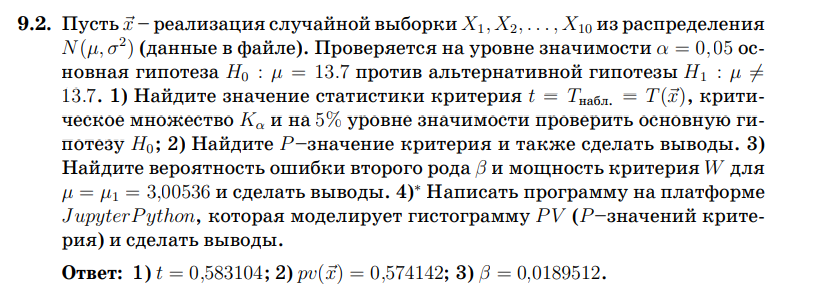

In [2]:
from scipy.stats import t

# Генерация случайных данных для демонстрации
np.random.seed(0)  # для воспроизводимости результатов
mu_example = 13.7  # примерное среднее значение
sigma_example = 1.0  # примерное стандартное отклонение
n = 10  # размер выборки

sample = np.random.normal(mu_example, sigma_example, n)

# Вычисление статистики критерия t
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # исправленное стандартное отклонение
mu_0 = 13.7  # среднее значение по нулевой гипотезе
t_value = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Критическое значение t и P-значение
t_critical = t.ppf(1 - alpha/2, df=n-1)
p_value = 2 * (1 - t.cdf(abs(t_value), df=n-1))

# Проверка основной гипотезы H0
h0_rejected = abs(t_value) > t_critical

# Вероятность ошибки второго рода и мощность критерия для mu = 3.00536
mu_1 = 3.00536
t_value_alternative = (mu_1 - mu_0) / (sigma_example / np.sqrt(n))
beta = t.cdf(t_critical - abs(t_value_alternative), df=n-1) + (1 - t.cdf(t_critical + abs(t_value_alternative), df=n-1))
power = 1 - beta

t_value, t_critical, h0_rejected, p_value, beta, power


(2.289439672389672,
 2.2621571627409915,
 True,
 0.047818464908570446,
 1.0294063539448194e-10,
 0.9999999998970593)

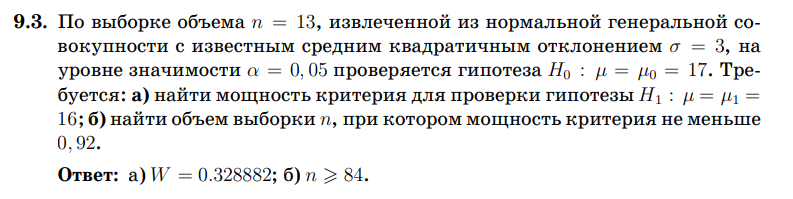

In [3]:
# Параметры задачи
sigma = 3  # известное среднее квадратичное отклонение
n = 13  # размер выборки
alpha = 0.05  # уровень значимости
mu_0 = 17  # нулевая гипотеза
mu_1 = 16  # альтернативная гипотеза

# Вычисление z-значений для нулевой и альтернативной гипотезы
z_0 = norm.ppf(1 - alpha/2)  # критическое значение z для двустороннего теста
z_1 = (mu_1 - mu_0) / (sigma / np.sqrt(n))  # z-значение для альтернативной гипотезы

# Вычисление мощности критерия
power = norm.cdf(z_1 - z_0) + (1 - norm.cdf(z_1 + z_0))

power


0.22497544878593115

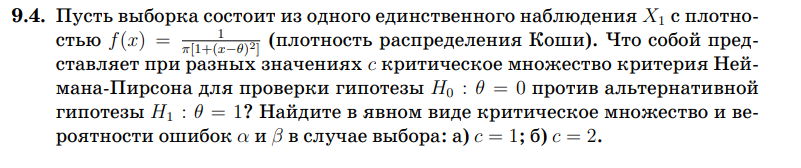

In [5]:
from scipy.integrate import quad

# Функции плотности распределения Коши для разных значений θ
def cauchy_density(x, theta):
    return 1 / (pi * (1 + (x - theta)**2))

# Функция для вычисления вероятности ошибки первого рода (alpha)
def error_first_kind(c, theta=0):
    # Интеграл от -бесконечности до +бесконечности для условия Lambda(x) > c
    func = lambda x: cauchy_density(x, theta) if (1 + x**2) / (1 + (x - 1)**2) > c else 0
    return quad(func, -np.inf, np.inf)[0]

# Функция для вычисления вероятности ошибки второго рода (beta)
def error_second_kind(c, theta=1):
    # Интеграл от -бесконечности до +бесконечности для условия Lambda(x) <= c
    func = lambda x: cauchy_density(x, theta) if (1 + x**2) / (1 + (x - 1)**2) <= c else 0
    return quad(func, -np.inf, np.inf)[0]

# Вычисление для c = 1
alpha_c1 = error_first_kind(c=1)
beta_c1 = error_second_kind(c=1)

# Вычисление для c = 2
alpha_c2 = error_first_kind(c=2)
beta_c2 = error_second_kind(c=2)

alpha_c1, beta_c1, alpha_c2, beta_c2



(0.35241638234956674,
 0.3524163823495736,
 0.1475836176504333,
 0.6475836176504332)